In [4]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

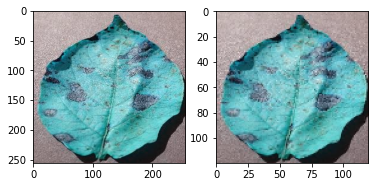

In [7]:
img=cv2.imread("C:/Programming Files/potato-disease/PlantVillage/Potato Early blight/0d9dbf50-53a9-42b2-8b29-0360fb7dbd98___RS_Early.B 6692.JPG")
img1=cv2.resize(img,(120,120))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img1)

In [8]:
img_size=120

categories=["Potato Early blight","Potato healthy","Potato Late blight"]

def get_images(dir):
    images=[]
    labels=[]
    for category in categories:
        img_path=os.path.join(dir,category)
        category_num=categories.index(category)
        for img in os.listdir(img_path):
            try:
                get_image=cv2.imread(os.path.join(img_path,img))
                get_image=cv2.resize(get_image,(img_size,img_size))
                images.append(get_image)
                labels.append(category_num)
            except:
                pass

    return shuffle(images,labels)

In [9]:
data_dir="C:/Programming Files/potato-disease/PlantVillage"
img_data,img_label=get_images(data_dir)

In [10]:
img_data=np.array(img_data)
img_label=np.array(img_label)
(img_data.shape,img_label.shape)

((2152, 120, 120, 3), (2152,))

In [11]:
x_train,x_test,y_train,y_test=train_test_split(img_data,img_label,test_size=0.2,random_state=42)
(x_train.shape,x_test.shape)

((1721, 120, 120, 3), (431, 120, 120, 3))

In [14]:
model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 100)     2800      
                                                                 
 activation (Activation)     (None, 118, 118, 100)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 100)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 64)        57664     
                                                                 
 activation_1 (Activation)   (None, 57, 57, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                  

In [16]:
trained_data=model.fit(x_train,y_train,epochs=12,validation_split=0.3)

Epoch 1/12
38/38 [==============================] - 45s 1s/step - loss: 1.8056 - accuracy: 0.4535 - val_loss: 0.8866 - val_accuracy: 0.4894
Epoch 2/12
38/38 [==============================] - 42s 1s/step - loss: 0.9101 - accuracy: 0.4875 - val_loss: 0.8538 - val_accuracy: 0.5551
Epoch 3/12
38/38 [==============================] - 42s 1s/step - loss: 0.8683 - accuracy: 0.5008 - val_loss: 0.8260 - val_accuracy: 0.5996
Epoch 4/12
38/38 [==============================] - 42s 1s/step - loss: 0.7745 - accuracy: 0.5664 - val_loss: 0.6209 - val_accuracy: 0.7021
Epoch 5/12
38/38 [==============================] - 42s 1s/step - loss: 0.6022 - accuracy: 0.7176 - val_loss: 0.3742 - val_accuracy: 0.8549
Epoch 6/12
38/38 [==============================] - 43s 1s/step - loss: 0.5155 - accuracy: 0.7874 - val_loss: 0.3860 - val_accuracy: 0.8453
Epoch 7/12
38/38 [==============================] - 43s 1s/step - loss: 0.4063 - accuracy: 0.8306 - val_loss: 0.2979 - val_accuracy: 0.8685
Epoch 8/12
38/38 [==

In [17]:
model.evaluate(x_test,y_test,verbose=1)

14/14 [==============================] - 3s 243ms/step - loss: 0.2272 - accuracy: 0.9188


[0.2271532416343689, 0.9187934994697571]